In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

import numpy as np
import pandas as pd

from skimage import img_as_float, io, img_as_bool
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage import exposure

from skimage.restoration import denoise_nl_means, denoise_wavelet, estimate_sigma

from skimage.metrics import peak_signal_noise_ratio

from skimage.filters import try_all_threshold

from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.feature_extraction.image import reconstruct_from_patches_2d

In [2]:
IMG_PATH = Path.cwd() / Path('dataset') / Path('2') / Path('IMG_20200615_184009_12.jpg')

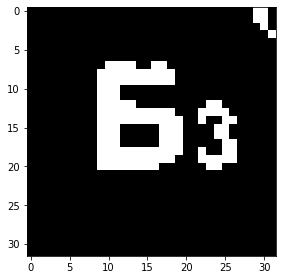

In [5]:
image = img_as_bool(imread(IMG_PATH))
imshow(image)

In [4]:
image

array([[[ 34,  40,  52],
        [ 41,  41,  67],
        [ 40,  43,  84],
        ...,
        [ 16,  51,  89],
        [ 13,  39,  74],
        [ 14,  29,  62]],

       [[ 30,  39,  46],
        [ 35,  51,  77],
        [ 41,  69, 119],
        ...,
        [ 33,  77, 122],
        [ 24,  57, 100],
        [ 15,  37,  78]],

       [[ 20,  37,  47],
        [ 21,  57,  91],
        [ 29,  90, 153],
        ...,
        [ 44,  96, 154],
        [ 37,  78, 132],
        [ 26,  56, 108]],

       ...,

       [[ 24,  41,  57],
        [ 20,  31,  51],
        [ 21,  32,  62],
        ...,
        [ 27,  64, 108],
        [ 23,  47,  83],
        [ 20,  39,  69]],

       [[ 18,  33,  40],
        [ 27,  36,  43],
        [ 24,  31,  41],
        ...,
        [ 31,  52,  83],
        [ 30,  38,  61],
        [ 27,  33,  49]],

       [[ 27,  34,  42],
        [ 15,  25,  27],
        [ 24,  36,  36],
        ...,
        [ 26,  36,  61],
        [ 29,  28,  46],
        [ 28,  26,  39]]

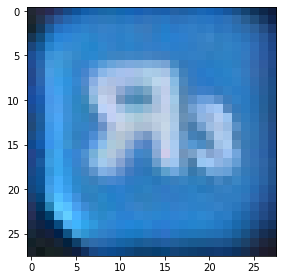

In [5]:
imshow(image)

In [6]:
gray_image = rgb2gray(image)
gray_image2 = rgb2gray(image2)

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


TypeError: '>=' not supported between instances of 'AxesSubplot' and 'Figure'

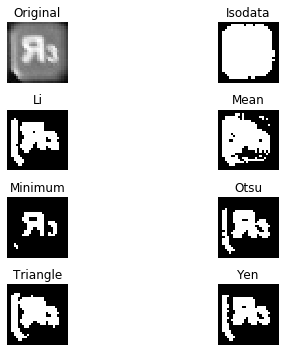

In [47]:
imshow(try_all_threshold(gray_image))

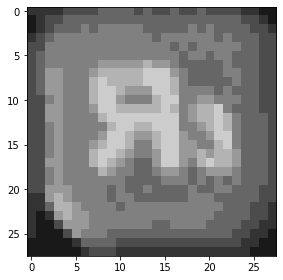

In [8]:
imshow(np.around(gray_image, decimals=1))

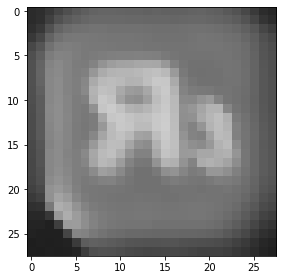

In [41]:
imshow(denoise_nl_means(gray_image, patch_size=2, patch_distance=1))

In [10]:
denoise_nl_means(gray_image2, patch_size=2).shape

(28, 28)

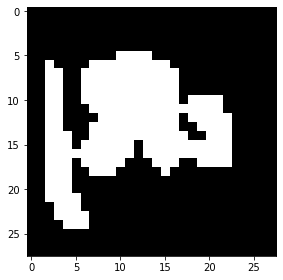

In [11]:
imshow(np.around(denoise_nl_means(gray_image, patch_size=2), decimals=0))

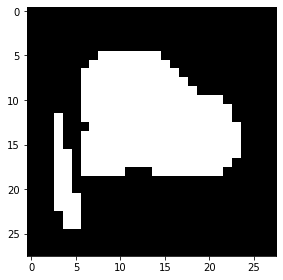

In [12]:
imshow(np.around(denoise_nl_means(gray_image), decimals=0))

In [13]:
rounded_image = np.around(gray_image, decimals=1)

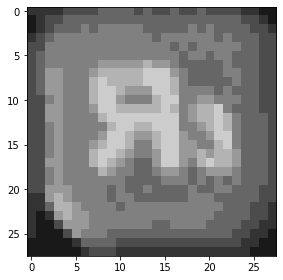

In [14]:
imshow(rounded_image)

In [15]:
rounded_image

array([[0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.3,
        0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2,
        0.1, 0.1],
       [0.1, 0.2, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4,
        0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.3, 0.3,
        0.2, 0.1],
       [0.1, 0.2, 0.3, 0.4, 0.4, 0.4, 0.5, 0.4, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.4, 0.4, 0.4, 0.4, 0.4, 0.5, 0.4, 0.5, 0.4, 0.4, 0.4, 0.4, 0.3,
        0.3, 0.2],
       [0.2, 0.3, 0.4, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.4, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.4, 0.5, 0.4, 0.4, 0.4,
        0.3, 0.3],
       [0.3, 0.3, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.4, 0.5, 0.4, 0.5, 0.5, 0.5, 0.5, 0.5, 0.4, 0.4,
        0.3, 0.3],
       [0.3, 0.4, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.4, 0.5, 0.5, 0.4, 0.5, 0.5, 0.4, 0.4, 0.4,
        0.3, 0.3],
       [0.

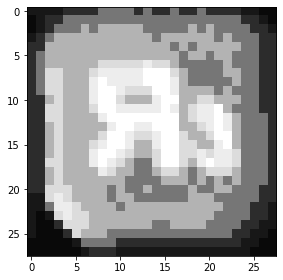

In [16]:
imshow(exposure.equalize_hist(rounded_image))

In [17]:
(exposure.equalize_hist(rounded_image))

array([[0.09183673, 0.09183673, 0.09183673, 0.09183673, 0.17957362,
        0.17957362, 0.17957362, 0.17957362, 0.4630102 , 0.4630102 ,
        0.4630102 , 0.4630102 , 0.17957362, 0.4630102 , 0.17957362,
        0.17957362, 0.4630102 , 0.17957362, 0.17957362, 0.4630102 ,
        0.17957362, 0.17957362, 0.17957362, 0.17957362, 0.09183673,
        0.09183673, 0.03571429, 0.03571429],
       [0.03571429, 0.09183673, 0.17957362, 0.17957362, 0.4630102 ,
        0.4630102 , 0.4630102 , 0.4630102 , 0.4630102 , 0.4630102 ,
        0.4630102 , 0.4630102 , 0.4630102 , 0.4630102 , 0.4630102 ,
        0.4630102 , 0.4630102 , 0.4630102 , 0.4630102 , 0.4630102 ,
        0.4630102 , 0.4630102 , 0.4630102 , 0.4630102 , 0.17957362,
        0.17957362, 0.09183673, 0.03571429],
       [0.03571429, 0.09183673, 0.17957362, 0.4630102 , 0.4630102 ,
        0.4630102 , 0.70153061, 0.4630102 , 0.70153061, 0.70153061,
        0.70153061, 0.70153061, 0.70153061, 0.4630102 , 0.4630102 ,
        0.4630102 , 0.4630

C:\ProgramData\Anaconda3\lib\site-packages\skimage\exposure\exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


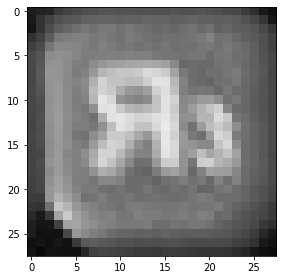

In [18]:
imshow(rgb2gray(exposure.equalize_hist(image)))

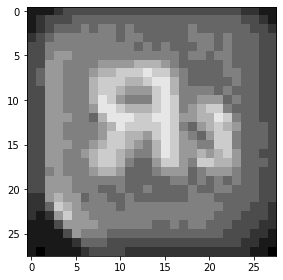

In [19]:
imshow(np.around(rgb2gray(exposure.equalize_hist(image)), decimals=1))

In [20]:
np.around(gray_image, decimals=1)

array([[0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.3,
        0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2,
        0.1, 0.1],
       [0.1, 0.2, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4,
        0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.3, 0.3,
        0.2, 0.1],
       [0.1, 0.2, 0.3, 0.4, 0.4, 0.4, 0.5, 0.4, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.4, 0.4, 0.4, 0.4, 0.4, 0.5, 0.4, 0.5, 0.4, 0.4, 0.4, 0.4, 0.3,
        0.3, 0.2],
       [0.2, 0.3, 0.4, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.4, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.4, 0.5, 0.4, 0.4, 0.4,
        0.3, 0.3],
       [0.3, 0.3, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.4, 0.5, 0.4, 0.5, 0.5, 0.5, 0.5, 0.5, 0.4, 0.4,
        0.3, 0.3],
       [0.3, 0.4, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.4, 0.5, 0.5, 0.4, 0.5, 0.5, 0.4, 0.4, 0.4,
        0.3, 0.3],
       [0.

In [21]:
img_frame = pd.DataFrame(np.around(gray_image, decimals=1).ravel())

In [22]:
img_frame.nunique

<bound method DataFrame.nunique of        0
0    0.2
1    0.2
2    0.2
3    0.2
4    0.3
..   ...
779  0.2
780  0.2
781  0.1
782  0.1
783  0.1

[784 rows x 1 columns]>

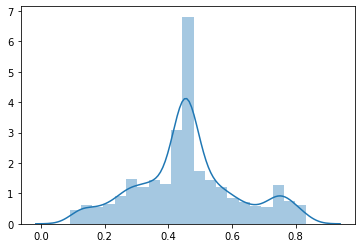

In [44]:
sns_plot = sns.distplot(gray_image.ravel())
fig = sns_plot.get_figure()

In [25]:
binary_image = np.zeros((image.shape[0],image.shape[1]))

In [26]:
patches = extract_patches_2d(image, (2,2))


In [27]:
patches.shape

(729, 2, 2, 3)